### Motive
__Problem Statement:__ Predicting the sensor outputs

__Dataset:__ APS Sensor Fault Detection dataset

__Runtime:__ GPU

__Libraries used:__ TensorFlow - Keras

In [73]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
data = pd.read_csv("/content/aps_data.csv")
data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [76]:
data.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [77]:
data = data.replace("na",np.NAN)

In [78]:
data.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
          ... 
ee_007      58
ee_008      58
ee_009      58
ef_000     242
eg_000     242
Length: 171, dtype: int64

In [79]:
data.isnull().sum().sort_values(ascending=False)

br_000    4105
bq_000    4043
bp_000    3960
ab_000    3849
cr_000    3849
          ... 
cj_000      38
ci_000      38
bt_000      12
aa_000       0
class        0
Length: 171, dtype: int64

In [80]:
pd.DataFrame(data.isnull().sum().sort_values(ascending=False)).rename(columns={0:"Null Value Count"})

,Null Value Count
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
...,...
cj_000,38
ci_000,38
bt_000,12
aa_000,0


In [81]:
for feature in [feature for feature in data.columns if feature not in ['class']]:
  data[feature]=data[feature].fillna(data[feature].median())

In [82]:
data.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [83]:
X = data.drop("class",axis=1)
y = data['class']

In [84]:
y = pd.get_dummies(y,drop_first=True)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)  

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building a TensorFlow Model

In [87]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [88]:
classifier = Sequential()
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu', input_dim= 170))
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                1710      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [89]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'])

In [90]:
model_history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 20, validation_split=0.30)

Epoch 1/20
280/280 [==============================] - 2s 4ms/step - loss: 0.1971 - accuracy: 0.9550 - val_loss: 0.0728 - val_accuracy: 0.9875
Epoch 2/20
280/280 [==============================] - 1s 4ms/step - loss: 0.0580 - accuracy: 0.9839 - val_loss: 0.0539 - val_accuracy: 0.9808
Epoch 3/20
280/280 [==============================] - 1s 5ms/step - loss: 0.0349 - accuracy: 0.9904 - val_loss: 0.0462 - val_accuracy: 0.9825
Epoch 4/20
280/280 [==============================] - 1s 4ms/step - loss: 0.0260 - accuracy: 0.9907 - val_loss: 0.0470 - val_accuracy: 0.9825
Epoch 5/20
280/280 [==============================] - 1s 3ms/step - loss: 0.0222 - accuracy: 0.9925 - val_loss: 0.0414 - val_accuracy: 0.9850
Epoch 6/20
280/280 [==============================] - 1s 3ms/step - loss: 0.0189 - accuracy: 0.9936 - val_loss: 0.0398 - val_accuracy: 0.9875
Epoch 7/20
280/280 [==============================] - 1s 4ms/step - loss: 0.0159 - accuracy: 0.9943 - val_loss: 0.0455 - val_accuracy: 0.9875
Epoch 

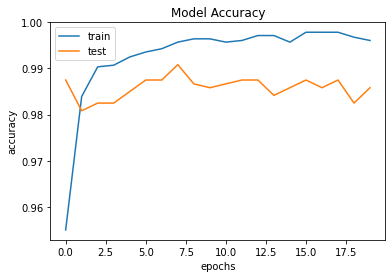

In [91]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

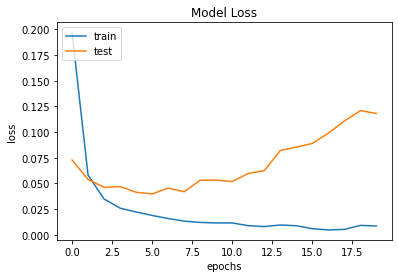

In [92]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [94]:
y_pred= classifier.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [99]:
y_pred = y>0.05

In [102]:
y_pred2 = y_pred[:1000]

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred2,y_test)

array([[969,  14],
       [ 17,   0]])

### Hyperparameter Tuing

In [ ]:
!pip install keras-tuner --upgrade

In [107]:
from kerastuner.tuners import RandomSearch

In [108]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu', input_dim= 170))
  model.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  optimizer = hp.Choice("optimizer",values=['adam','sgd','rmsprop','adadelta'])
  model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])
  model.summary()
  return model

In [114]:
tuner = RandomSearch(build_model,objective='val_accuracy', max_trials=5, directory="project1",project_name="aps-fault")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                5472      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [115]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Trial 4 Complete [00h 00m 04s]
val_accuracy: 0.9919999837875366

Best val_accuracy So Far: 0.9919999837875366
Total elapsed time: 00h 00m 19s


In [117]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [119]:
best_model = tuner.get_best_models(num_models=1)[0]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [124]:
from tensorflow.keras import optimizers
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [133]:
tuner_second=RandomSearch(build_model,objective='val_accuracy',max_trials=50,directory='project4',project_name='aps-fault-sensor')

In [134]:
tuner_second.search(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Trial 50 Complete [00h 00m 29s]
val_accuracy: 0.9950000047683716

Best val_accuracy So Far: 0.9950000047683716
Total elapsed time: 00h 41m 56s


In [135]:
tuner_second.get_best_hyperparameters()[0].values

{'num_layers': 17,
 'units_0': 512,
 'units_1': 64,
 'learning_rate': 0.0001,
 'units_2': 416,
 'units_3': 224,
 'units_4': 32,
 'units_5': 192,
 'units_6': 512,
 'units_7': 128,
 'units_8': 256,
 'units_9': 128,
 'units_10': 64,
 'units_11': 320,
 'units_12': 480,
 'units_13': 192,
 'units_14': 384,
 'units_15': 32,
 'units_16': 288,
 'units_17': 32,
 'units_18': 480}

In [136]:
classifier2=tuner_second.get_best_models(num_models=1)[0]

In [137]:
classifier2.summary()

ValueError: ignored